In [15]:
import numpy as np 
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import scipy.stats as stat
import statsmodels.api as smf
import statsmodels.api as sm
import statsmodels.formula.api as sm
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [16]:
bank_data = pd.read_csv("C:\\DataScience\\Assignment\\Logistic regression\\bank-full.csv", header=0)

In [19]:
bank_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [20]:
bank_data.shape

(45211, 17)

In [33]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [35]:
data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211.000000
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,NaN
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,NaN
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,NaN
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,0.116985
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,0.321406
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,0.000000
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,0.000000
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,0.000000
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,0.000000


In [75]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Y            0
dtype: int64

In [74]:
bank_data['Y'].unique()

array(['no', 'yes'], dtype=object)

In [76]:
bank_data['Y'].value_counts()

no     39922
yes     5289
Name: Y, dtype: int64

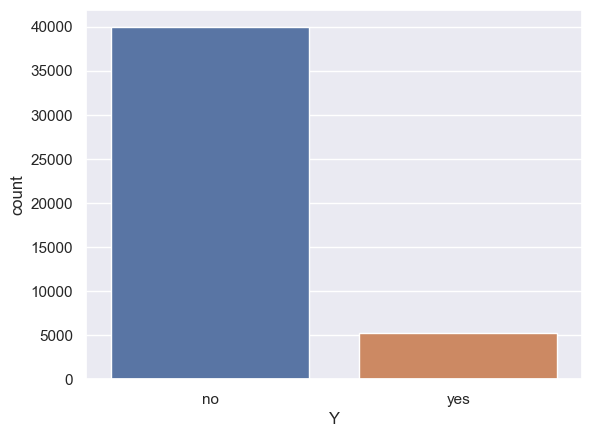

In [77]:
# Visualise count plot
sns.countplot(data=bank_data,x='Y')
plt.show()

In [36]:
# We make sure to create a copy of the data before we start altering it. Note that we don't change the original data we loaded.
data = bank_data.copy()

In [37]:
# Now Split DataSet into 2 parts
# Numeric type and Categorical type
data_num=data.select_dtypes(['int64','float64'])
data_cat=data.select_dtypes(object)

In [38]:
data_num

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [39]:
data_cat

,job,marital,education,default,housing,loan,contact,month,poutcome,Y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [41]:
from sklearn.preprocessing import LabelEncoder
for col in data_cat:
    # create an object of LabelEncoder
    le=LabelEncoder()
    data_cat[col]=le.fit_transform(data_cat[col])

In [44]:
data_cat.dtypes

job          int32
marital      int32
education    int32
default      int32
housing      int32
loan         int32
contact      int32
month        int32
poutcome     int32
Y            int32
dtype: object

In [78]:
# After applying LabelEncoder we concatenate data_cat and data_num.
bank_new=pd.concat([data_num,data_cat],axis=1)

In [48]:
bank_new

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,Y
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3,0
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3,0
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3,0
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,9,1,2,0,0,0,0,9,3,1
45207,71,1729,17,456,2,-1,0,5,0,0,0,0,0,0,9,3,1
45208,72,5715,17,1127,5,184,3,5,1,1,0,0,0,0,9,2,1
45209,57,668,17,508,4,-1,0,1,1,1,0,0,0,1,9,3,0


In [50]:
bank_new.corr()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,Y
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,-0.021868,-0.403240,-0.106807,-0.017879,-0.185513,-0.015655,0.026221,-0.042357,0.007367,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.018232,0.002122,0.064514,-0.066745,-0.068768,-0.084350,-0.027273,0.019777,-0.020967,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,0.022856,-0.005261,0.022671,0.009424,-0.027982,0.011370,-0.027936,-0.006028,0.083460,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.004744,0.011852,0.001935,-0.010021,0.005075,-0.012412,-0.020839,0.006314,0.010925,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,0.006839,-0.008994,0.006255,0.016822,-0.023599,0.009980,0.019614,-0.110031,0.101588,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,-0.024455,0.019172,0.000052,-0.029979,0.124178,-0.022754,-0.244816,0.033065,-0.858362,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,-0.000911,0.014973,0.017570,-0.018329,0.037076,-0.011043,-0.147811,0.022727,-0.489752,0.093236
job,-0.021868,0.018232,0.022856,0.004744,0.006839,-0.024455,-0.000911,1.000000,0.062045,0.166707,-0.006853,-0.125363,-0.033004,-0.082063,-0.092870,0.011010,0.040438
marital,-0.403240,0.002122,-0.005261,0.011852,-0.008994,0.019172,0.014973,0.062045,1.000000,0.108576,-0.007023,-0.016096,-0.046893,-0.039201,-0.006991,-0.016850,0.045588
education,-0.106807,0.064514,0.022671,0.001935,0.006255,0.000052,0.017570,0.166707,0.108576,1.000000,-0.010718,-0.090790,-0.048574,-0.110928,-0.057304,-0.019361,0.066241


In [51]:
bank_new.corr().sum()

age          0.331728
balance      1.018756
day          1.037138
duration     1.293868
campaign     0.891921
pdays        0.350983
previous     0.907154
job          0.945484
marital      0.713779
education    1.010040
default      0.969275
housing      0.883977
loan         0.823767
contact      1.022585
month        1.375049
poutcome    -0.079222
Y            1.239635
dtype: float64

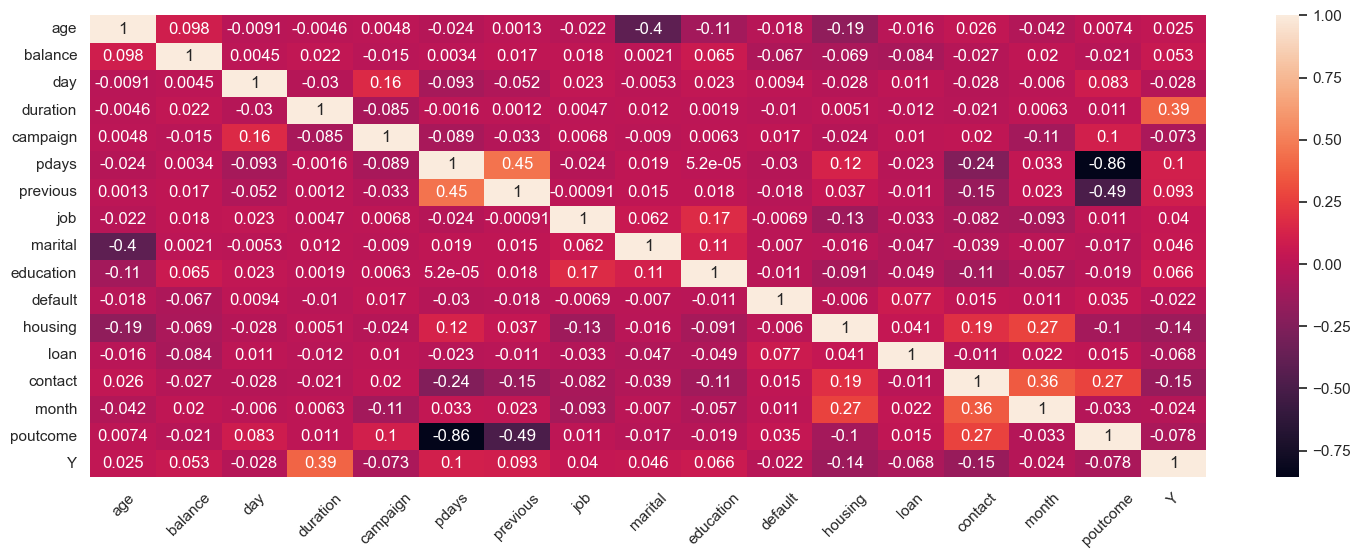

In [55]:
# making the heatmap of that 
fig= plt.figure(figsize=(18, 6))
sns.heatmap(bank_new.corr(), annot=True);
plt.xticks(rotation=45);

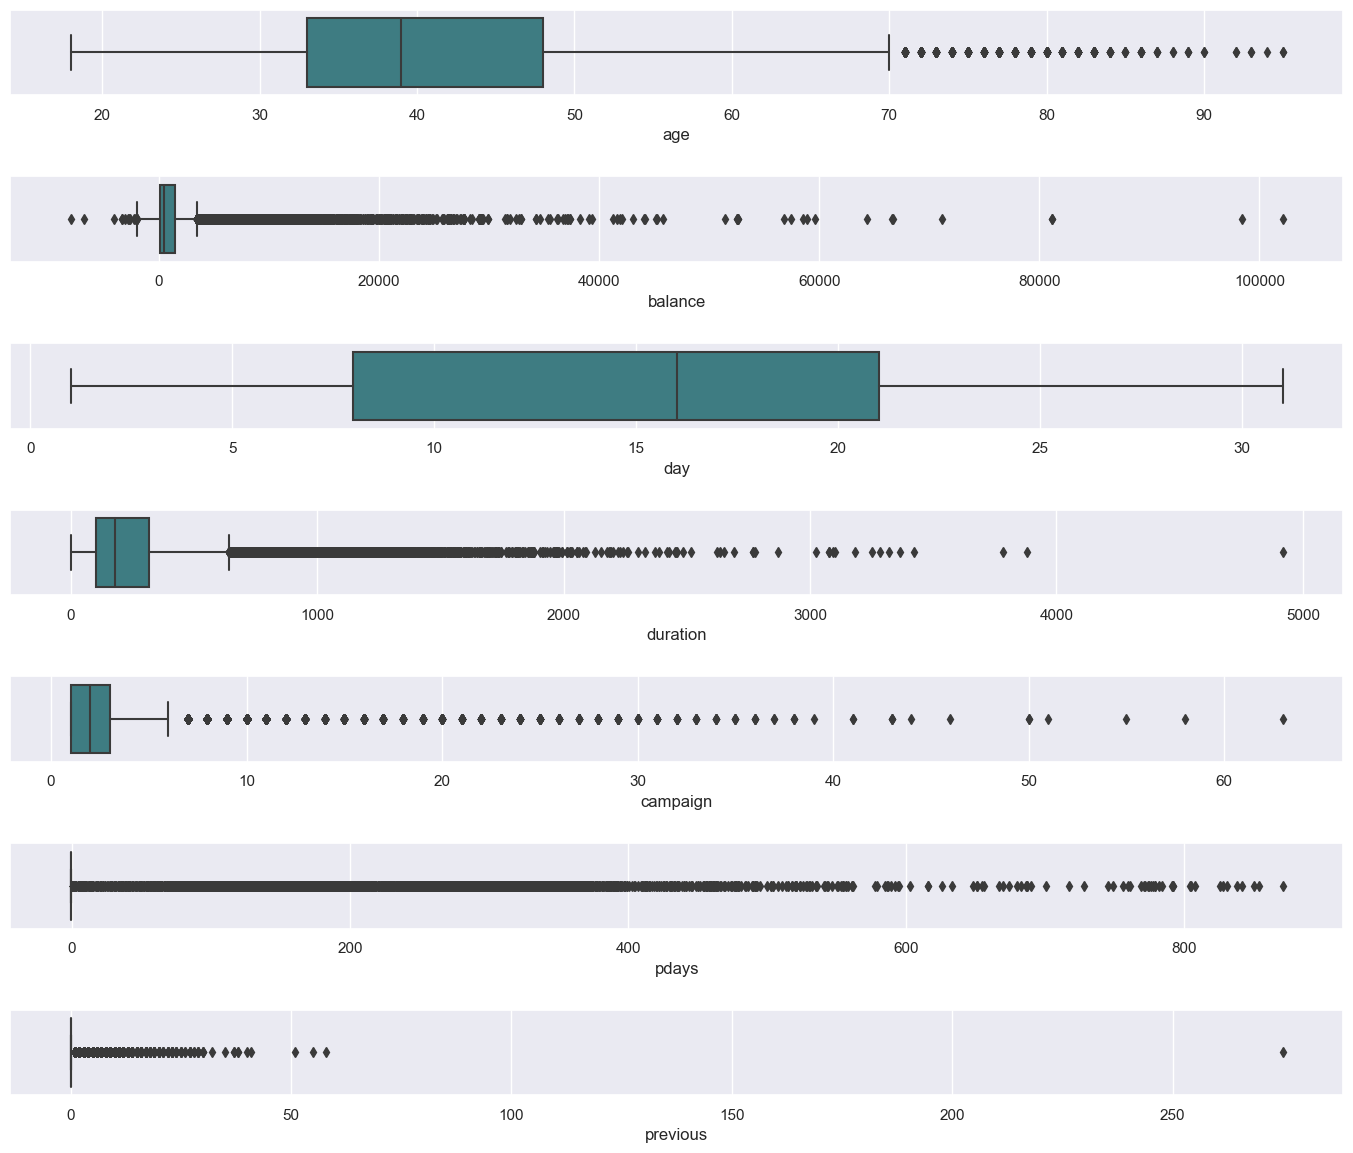

In [56]:
bank_new2=bank_new.copy() 
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='age',data=bank_new2,palette='crest',ax=axes[0])
sns.boxplot(x='balance',data=bank_new2,palette='crest',ax=axes[1])
sns.boxplot(x='day',data=bank_new2,palette='crest',ax=axes[2])
sns.boxplot(x='duration',data=bank_new2,palette='crest',ax=axes[3])
sns.boxplot(x='campaign',data=bank_new2,palette='crest',ax=axes[4])
sns.boxplot(x='pdays',data=bank_new2,palette='crest',ax=axes[5])
sns.boxplot(x='previous',data=bank_new2,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

# as we can see we have so many outliers and droping them will leads to loss of data in very large amount which is not recommended 

In [59]:
X=bank_new2.drop('Y',axis=1)
Y=bank_new2['Y']  

In [60]:
# Now Train_test_split
X_test,X_train,Y_test,Y_train=train_test_split(X,Y,test_size=0.3,random_state=1)

In [61]:
# Now applying Scaling on input data X_train and X_test before we train the model
# Apply StandardScaler on input data training and testing
from sklearn.preprocessing import StandardScaler

In [62]:
# Create an object of StandardScaler class
ss=StandardScaler()
#means apply standard scaler for X_train and X_test data

X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [63]:
X_train

array([[ 0.09881684,  0.42807061, -0.09973222, ...,  1.49797145,
         0.83078232,  0.44805792],
       [-0.37151499,  0.31707647,  0.49973948, ...,  1.49797145,
         0.16768173,  0.44805792],
       [-0.84184683, -0.14337018,  0.14005646, ..., -0.7181473 ,
        -1.82162004,  0.44805792],
       ...,
       [-0.93591319, -0.47384628,  1.09921117, ..., -0.7181473 ,
        -1.49006974,  0.44805792],
       [ 0.85134778, -0.47205606, -1.53846429, ...,  1.49797145,
        -0.16386856,  0.44805792],
       [-0.46558136,  1.65938947,  0.73952815, ..., -0.7181473 ,
         1.82543321, -0.55964522]])

In [64]:
# Create the model of LofisticRegression, Why?
# Because we predict the output in Yes/no format as we have a classification type dataset.
# # Use baseline model : LogisticRegression
from sklearn.linear_model import LogisticRegression

In [66]:
# Create an object of LogisticRegression class
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [67]:
Y_pred=lr.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [68]:
# Create a Dictionary
dict={'Actual Output':Y_test,'Predicted Output':Y_pred}
df1=pd.DataFrame(dict)
df1.head(26)

,Actual Output,Predicted Output
6149,0,0
12403,0,0
21645,0,0
29580,0,0
31245,0,0
32032,0,0
18295,0,0
42774,1,0
26345,0,0
31747,0,0


In [69]:
# Check accuracy of model use inbuilt method score() of LogisticRegression.
lr.score(X_test,Y_test)      # Score always varies between 0-1

0.8906373431920878

In [70]:
# Generation Classification report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [71]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     27909
           1       0.61      0.20      0.30      3738

    accuracy                           0.89     31647
   macro avg       0.76      0.59      0.62     31647
weighted avg       0.87      0.89      0.87     31647



In [72]:
print(confusion_matrix(Y_test,Y_pred))

[[27435   474]
 [ 2987   751]]
